### Declarations

In [2]:
import numpy as np
import gym
import random
from random import sample 
import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from IPython import display
%matplotlib inline

Using TensorFlow backend.


### Function to plot performance using reward list


In [3]:
def plotGraph(print_reward):
    x = np.arange(len(print_reward))
    y = print_reward

    plt.plot(x, y) 

    plt.xlabel('Episodes') 
    plt.ylabel('Rewards') 
    plt.title('Performance graph!') 

    plt.show()

### Part A - Print out state and action space

In [6]:
env = gym.make('MountainCar-v0')
env.reset()
print(env.action_space.n)
print(env.reset().reshape(1,2))
print("Low of state space => ",env.observation_space.low)
print("high of state space => ",env.observation_space.high)
print("Action space consists of 3 discrete values => ",env.action_space.n)

3
[[-0.47664548  0.        ]]
Low of state space =>  [-1.2  -0.07]
high of state space =>  [0.6  0.07]
Action space consists of 3 discrete values =>  3


### Print the Reward function of random agent

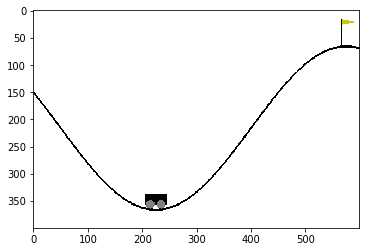

In [4]:
img = plt.imshow(env.render(mode='rgb_array'))
rewardl =[]
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) 
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    new_state, reward,done,emt = env.step(action)
    rewardl.append(reward)

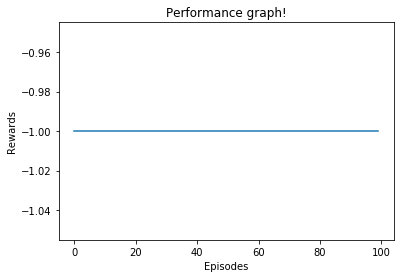

In [5]:
plotGraph(rewardl)

## Part B

### Creates model to use in DQN

In [5]:
def create_model(state_shape,out_shape):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=state_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(out_shape, activation=None)
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.005),
        loss="mean_squared_error")
    return model

### DQN implementation

In [6]:
def DQN(env_name,count_episode,count_per_episode,discount_rate,exploration_decay):
    #Generate Environment
    env = gym.make("MountainCar-v0")
    env.reset()
    
    #Create initial and target Model
    model= create_model(env.observation_space.shape,env.action_space.n)
    target_model = create_model(env.observation_space.shape,env.action_space.n)
    
    #Environment display in plot
    img = plt.imshow(env.render(mode='rgb_array'))
    
    #Initialize lists
    print_reward = []
    memoization_list = []
    
    #setting up exploration rates
    exploration_rate = 1
    min_exploration_rate = 0.01
    
    #Running for every episode
    for episode in range(count_episode):
        state = env.reset().reshape(1,2)
        
        #Dacaying the exploration rate after every episode
        exploration_rate =  exploration_rate * exploration_decay
        exploration_rate = max(exploration_rate,min_exploration_rate)
        
        #Total Reward will be the learning curve
        totalReward = 0
        
        for step in range(count_per_episode):

            #explore or exploit
            tmp = random.uniform(0,1)
            if tmp<exploration_rate:
                action = env.action_space.sample()
            else:
                action = np.argmax(model.predict(state)[0])
            
            #Apply action on environment
            new_state, reward,done,emt = env.step(action)
            
            img.set_data(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            
            new_state = new_state.reshape(1,2)
            
            #store state action information
            totalReward +=reward
            memoization_list.append([state,action,reward,new_state,done])
            
            #Fit into model
            if(len(memoization_list)>20):
                samples = sample(memoization_list,20)
                for eachSample in samples:
                    old_state, action, reward, new_state, done = eachSample
                    target = target_model.predict(old_state)
                    if done:
                        target[0][action] = reward
                    else:
                        expected_reward = max(target_model.predict(new_state)[0])
                        target[0][action] = reward + expected_reward * discount_rate
                    model.fit(old_state, target, epochs=1, verbose=0)
            
            #Updating weights into target model
            state = new_state
            weights = model.get_weights()
            target_weights = target_model.get_weights()
            for i in range(len(target_weights)):
                target_weights[i] = weights[i] * 0.1 + target_weights[i] * 0.9
            target_model.set_weights(target_weights)
            if done:
                break
        print_reward.append(totalReward)
    return print_reward

### Execute DQN

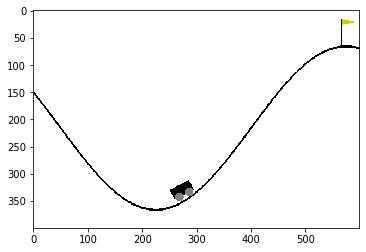

In [8]:
# DQN(env,episode,per_episode,dr,ed)
plotGraph1 = DQN("MountainCar-v0",500,200,0.99,0.95)

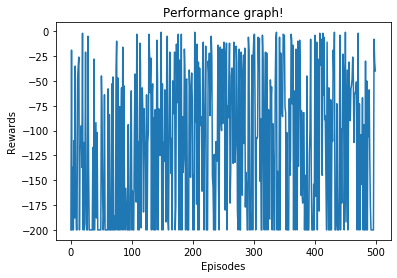

In [9]:
plotGraph(plotGraph1)

### Part C- Tuning Hyperparameters -

#### Selected hypreparameter is dacaying rate of exploration 0.85

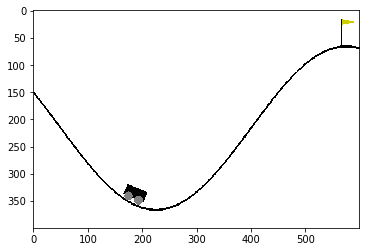

In [10]:
plotGraph2 = DQN("MountainCar-v0",500,200,0.99,0.85)

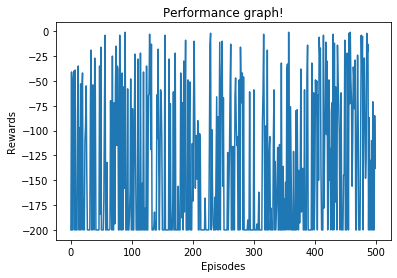

In [11]:
plotGraph(plotGraph2)

#### Selected hypreparameter is dacaying rate of exploration 0.75

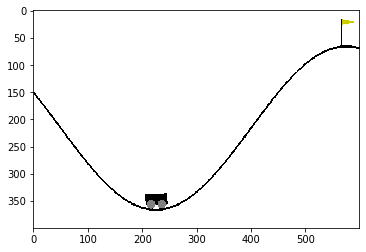

In [7]:
plotGraph3 = DQN("MountainCar-v0",500,200,0.99,0.75)

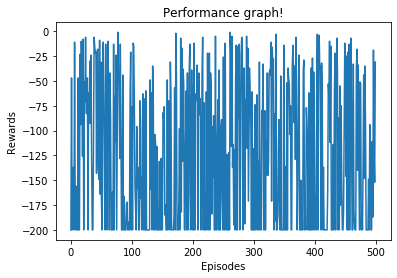

In [8]:
plotGraph(plotGraph3)

#### Plot hypertuning results on one plot

In [10]:
#plt1
x = np.arange(len(plotGraph1))
y = plotGraph1
plt.plot(x, y,label = "0.95") 

#plt2
x1 = np.arange(len(plotGraph2))
y1 = plotGraph2
plt.plot(x1, y1,label = "0.85") 

#plt3
x2 = np.arange(len(plotGraph3))
y2 = plotGraph3
plt.plot(x2, y2,label = "0.75") 

plt.xlabel('Episodes') 
plt.ylabel('Rewards') 
plt.title('Performance graph!') 

plt.legend() 
plt.show()

NameError: name 'plotGraph2' is not defined